# Milestone 2
* Nama  : Rizky Chester Abadi
* Batch : RMT-30
* Program ini dibuat untuk mengetahui apakah seseorang termasuk kategori pecandu alkohol atau tidak dilihat dari beberapa faktor dari dataset yang didapat dari National Health Insurance Service in Korea. Algortima yang digunakan adalah Ensembel learning dengan model KNN, SMV, Decisiontree, dan Random forest.  

### Penjelasan Feature-feature terkait dalam dataset

| Column | Description |
| --- | --- |
| Sex | male,female |
| age | round up to 5 years |
| height | round up to 5 cm[cm] |
| weight | [kg] |
| sight_left | eyesight(left) |
| sight_right | eyesight(right) |
| hear_left | hearing left, 1(normal), 2(abnormal) |
| hear_right | hearing right, 1(normal), 2(abnormal) |
| SBP | Systolic blood pressure[mmHg] |
| DBP | Diastolic blood pressure[mmHg] |
| BLDS | BLDS or FSG(fasting blood glucose)[mg/dL] |
| tot_chole | total cholesterol[mg/dL] |
| HDL_chole | HDL cholesterol[mg/dL] |
| LDL_chole | LDL cholesterol[mg/dL] |
| triglyceride | triglyceride[mg/dL] |
| hemoglobin | hemoglobin[g/dL] |
| urine_protein | protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4) |
| serum_creatinine | serum(blood) creatinine[mg/dL] |
| SGOT_AST | SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L] |
| SGOT_ALT | ALT(Alanine transaminase)[IU/L] |
| gamma_GTP | y-glutamyl transpeptidase[IU/L] |
| SMK_stat_type_cd | Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke) |
| DRK_YN | Drinker or Not |

## Import Libraries

In [1]:
!pip install feature-engine

In [63]:
import pandas as pd
import numpy as np
import pickle as pk
import json as js
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from scipy.stats import randint

## Data Loading

In [3]:
# Load Data
df=pd.read_csv(r'C:\Users\rizqc\Documents\CSV\Smoking and Drinking Dataset with body signal\smoking_drinking_dataset_Ver01.csv')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


***insight***: Terdapat 991346 row data dan 24 feature dalam dataset

In [4]:
# Membuat data sample sebanyak 15% dari dataset
df1 = df.sample(n=148702)
df1

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
267837,Female,30,160,65,85.0,0.4,0.4,1.0,1.0,123.0,...,75.0,168.0,12.6,1.0,0.4,14.0,11.0,17.0,1.0,N
698411,Male,30,175,70,78.5,1.5,1.5,1.0,1.0,124.0,...,114.0,103.0,15.3,1.0,1.0,28.0,30.0,21.0,3.0,Y
764594,Male,50,170,80,97.0,0.9,1.5,1.0,1.0,110.0,...,182.0,92.0,16.5,1.0,0.7,27.0,26.0,65.0,2.0,Y
6583,Male,35,185,75,78.2,1.2,1.0,1.0,1.0,120.0,...,108.0,86.0,15.3,1.0,1.2,20.0,16.0,13.0,1.0,Y
543594,Male,50,165,75,99.0,1.0,1.0,1.0,1.0,131.0,...,94.0,82.0,15.5,1.0,1.0,25.0,21.0,16.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379030,Male,40,160,60,84.0,0.8,0.8,1.0,1.0,94.0,...,110.0,282.0,14.6,1.0,0.9,18.0,11.0,13.0,3.0,Y
300938,Female,75,150,45,72.0,0.6,0.6,1.0,1.0,120.0,...,145.0,164.0,12.4,1.0,0.5,24.0,22.0,19.0,1.0,N
533524,Female,40,155,60,75.0,1.0,0.9,1.0,1.0,123.0,...,91.0,155.0,13.2,1.0,0.6,15.0,6.0,16.0,1.0,N
665141,Female,30,155,55,72.0,0.2,0.3,1.0,1.0,107.0,...,116.0,65.0,11.9,1.0,0.5,14.0,9.0,13.0,1.0,N


In [5]:
# Membuat csv untuk data sample
df1.to_csv('smoking_drinking_dataS.csv', index=False)

In [6]:
# Melihat data teratas
df1.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
267837,Female,30,160,65,85.0,0.4,0.4,1.0,1.0,123.0,...,75.0,168.0,12.6,1.0,0.4,14.0,11.0,17.0,1.0,N
698411,Male,30,175,70,78.5,1.5,1.5,1.0,1.0,124.0,...,114.0,103.0,15.3,1.0,1.0,28.0,30.0,21.0,3.0,Y
764594,Male,50,170,80,97.0,0.9,1.5,1.0,1.0,110.0,...,182.0,92.0,16.5,1.0,0.7,27.0,26.0,65.0,2.0,Y
6583,Male,35,185,75,78.2,1.2,1.0,1.0,1.0,120.0,...,108.0,86.0,15.3,1.0,1.2,20.0,16.0,13.0,1.0,Y
543594,Male,50,165,75,99.0,1.0,1.0,1.0,1.0,131.0,...,94.0,82.0,15.5,1.0,1.0,25.0,21.0,16.0,2.0,Y
185309,Male,45,180,75,82.1,1.0,1.2,1.0,1.0,120.0,...,77.0,78.0,14.4,1.0,0.9,23.0,21.0,27.0,2.0,Y
626336,Female,45,150,50,79.9,1.2,1.2,1.0,1.0,100.0,...,155.0,82.0,14.5,1.0,0.7,27.0,20.0,13.0,1.0,N
362027,Female,65,145,55,87.3,0.6,0.6,1.0,1.0,133.0,...,126.0,57.0,14.0,1.0,0.8,29.0,16.0,12.0,1.0,N
365350,Female,50,150,40,65.5,0.7,1.2,1.0,1.0,120.0,...,130.0,146.0,12.1,1.0,1.0,48.0,36.0,12.0,1.0,N
903205,Male,50,160,65,86.0,1.0,1.0,2.0,1.0,121.0,...,129.0,69.0,16.0,1.0,0.9,22.0,15.0,66.0,3.0,Y


In [7]:
# Melihat data 10 terbawah
df1.tail(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
150634,Male,60,170,75,85.0,0.5,0.6,1.0,1.0,126.0,...,154.0,154.0,16.6,1.0,1.0,20.0,17.0,25.0,3.0,Y
401008,Male,30,165,75,89.0,0.9,0.8,1.0,1.0,124.0,...,184.0,150.0,16.6,1.0,0.9,14.0,13.0,13.0,1.0,Y
389917,Male,50,165,90,99.0,0.8,0.7,2.0,2.0,131.0,...,65.0,106.0,16.5,1.0,0.8,24.0,77.0,102.0,1.0,N
769846,Female,45,160,55,71.2,0.2,0.2,1.0,1.0,133.0,...,111.0,85.0,12.4,1.0,0.7,58.0,29.0,10.0,1.0,N
334155,Female,70,150,50,83.0,1.5,1.2,1.0,1.0,129.0,...,46.0,217.0,12.6,1.0,0.8,30.0,23.0,24.0,1.0,N
379030,Male,40,160,60,84.0,0.8,0.8,1.0,1.0,94.0,...,110.0,282.0,14.6,1.0,0.9,18.0,11.0,13.0,3.0,Y
300938,Female,75,150,45,72.0,0.6,0.6,1.0,1.0,120.0,...,145.0,164.0,12.4,1.0,0.5,24.0,22.0,19.0,1.0,N
533524,Female,40,155,60,75.0,1.0,0.9,1.0,1.0,123.0,...,91.0,155.0,13.2,1.0,0.6,15.0,6.0,16.0,1.0,N
665141,Female,30,155,55,72.0,0.2,0.3,1.0,1.0,107.0,...,116.0,65.0,11.9,1.0,0.5,14.0,9.0,13.0,1.0,N
506966,Male,50,160,70,91.5,1.0,1.2,1.0,1.0,112.0,...,149.0,61.0,16.4,1.0,0.9,20.0,21.0,32.0,2.0,N


## Exploratory Data Analysist (EDA)

In [8]:
# Melihat info dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148702 entries, 267837 to 506966
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               148702 non-null  object 
 1   age               148702 non-null  int64  
 2   height            148702 non-null  int64  
 3   weight            148702 non-null  int64  
 4   waistline         148702 non-null  float64
 5   sight_left        148702 non-null  float64
 6   sight_right       148702 non-null  float64
 7   hear_left         148702 non-null  float64
 8   hear_right        148702 non-null  float64
 9   SBP               148702 non-null  float64
 10  DBP               148702 non-null  float64
 11  BLDS              148702 non-null  float64
 12  tot_chole         148702 non-null  float64
 13  HDL_chole         148702 non-null  float64
 14  LDL_chole         148702 non-null  float64
 15  triglyceride      148702 non-null  float64
 16  hemoglobin        14

***insight***: Terdapat 148702 row data dan 24 feature dalam dataset

In [9]:
df1.head().T

,267837,698411,764594,6583,543594
sex,Female,Male,Male,Male,Male
age,30,30,50,35,50
height,160,175,170,185,165
weight,65,70,80,75,75
waistline,85.0,78.5,97.0,78.2,99.0
sight_left,0.4,1.5,0.9,1.2,1.0
sight_right,0.4,1.5,1.5,1.0,1.0
hear_left,1.0,1.0,1.0,1.0,1.0
hear_right,1.0,1.0,1.0,1.0,1.0
SBP,123.0,124.0,110.0,120.0,131.0


In [10]:
# Cek Shape dataset
df1.shape

(148702, 24)

In [11]:
# Cek Data Duplicate
df1.duplicated().sum()

1

***insight***: Terdapat 2 data duplicate dalam dataset namun dibiarkan untuk menghindari Bias.

In [12]:
# Cek missingvallue
df1.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

***insight***: Tidak ada missing value dalam dataset yang digunakan sebagai sample

In [13]:
# Cek Informasi dataset
df1.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,...,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000,148702.000000
mean,47.605143,162.241799,63.320130,81.233183,0.978807,0.977271,1.031002,1.030349,122.413794,76.071391,...,56.944944,112.824353,132.406834,14.225754,1.092608,0.859700,25.928387,25.708229,37.128330,1.605849
std,14.175797,9.299358,12.557216,11.735748,0.597113,0.598958,0.173323,0.171547,14.530432,9.865610,...,15.185776,35.345813,102.606080,1.587946,0.432875,0.496507,21.224195,25.617067,51.407036,0.817688
min,20.000000,130.000000,30.000000,30.000000,0.100000,0.100000,1.000000,1.000000,70.000000,37.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,270.000000,156.000000,...,677.000000,2114.000000,4000.000000,23.300000,6.000000,98.000000,3440.000000,3517.000000,999.000000,3.000000


***insight***:
Hasil dari statistika deskriptif, terdapat perbandingan antara nilai 'mean' dan 'median'(IQR 50%) terdapat beberapa nilai 'mean' yang lebih besar dari 'median'. Hal ini menandakan adanya skewness yang bersifat positif, namun ada beberapa 'feature' dengan nilai 'median' lebih tinggi dari 'mean' yang berarti terdapat nilai skewness negatif.

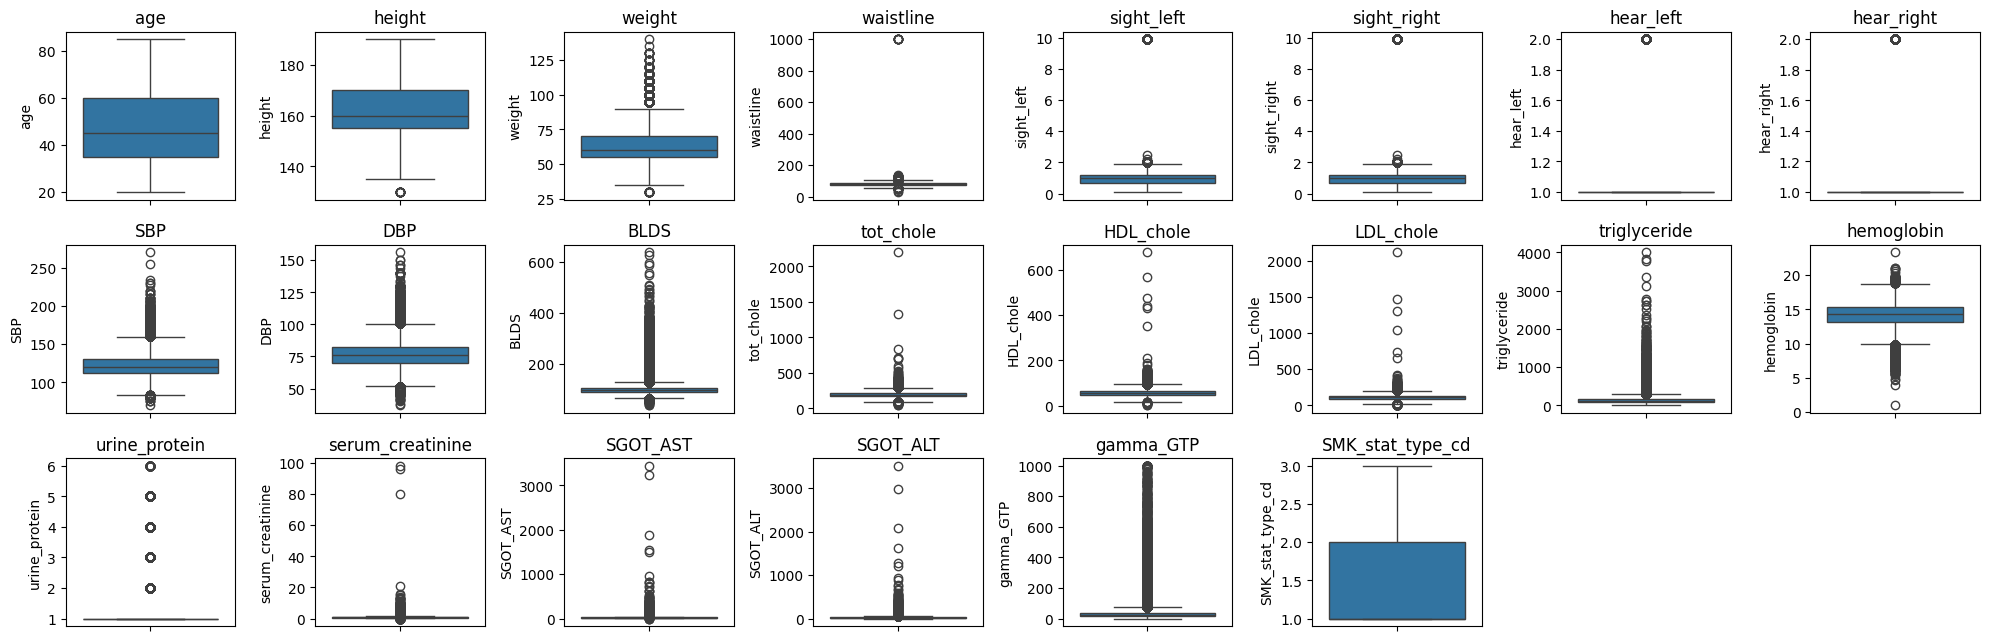

In [14]:
# Membuat Boxplot untuk feature/kolom dalam dataset
def boxplot_all_feat(df1):

    #untuk kolom numerik
    numeric_columns = df1.select_dtypes(include=['int', 'float']).columns

    plt.figure(figsize=(20, 15))

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(7, 8, i)
        sns.boxplot(y=df1[column])
        plt.title(column)

    plt.tight_layout()
    plt.show()

boxplot_all_feat(df1)


***insight***: hasil dari visualisasi boxplot menunjukkan terdapat outlier di sebagian besar kolom/feature kecuali feature 'age' dan 'SMK_stat_type_cd'

In [15]:
# Membuat dataframe kolom numerik dan kategorik untuk cek Skewness
df_numerik= df1.select_dtypes(exclude=['object', 'datetime64'])
df_kategorik=df1.select_dtypes(include=['object'])

In [16]:
# Define function untuk cek skewness
def cek_skewness(data):
    skewness_data=pd.DataFrame({'Skewness': data.skew()})
    return skewness_data

In [17]:
# cek skewness Data numerik
dfskew_num = cek_skewness(df_numerik)
dfskew_num


,Skewness
age,0.151205
height,-0.013750
weight,0.574646
waistline,25.813195
sight_left,10.012864
sight_right,10.051889
hear_left,5.411930
hear_right,5.475546
SBP,0.493778
DBP,0.391716


***insight***:
* Dari data didapatkan selain beberapa Feature yang termasuk Skewness moderate antara lain :['SMK_stat_type_cd','hemoglobin','DBP','SBP','weight','height','age'] dapat digunakan perhitungan Tukey Rule/IQR. Sedangkan sisanya termasuk Higly Skewed karena lebih dari 0.5 - 1 atau -0.5 - -1 sehingga dapat digunakan pergitungan Gaussian/Z-Score.

In [18]:
# Cek distribusi data kategorik
df_kategorik = df1.select_dtypes(include=['object'])

distribusi_Kateg= df_kategorik.value_counts()
distribusi_Kateg

sex     DRK_YN
Male    Y         52917
Female  N         48540
Male    N         25766
Female  Y         21479
Name: count, dtype: int64

In [19]:
# Cek Cardinality
df1.nunique()

sex                    2
age                   14
height                13
weight                23
waistline            616
sight_left            23
sight_right           24
hear_left              2
hear_right             2
SBP                  140
DBP                  103
BLDS                 363
tot_chole            348
HDL_chole            159
LDL_chole            314
triglyceride        1033
hemoglobin           154
urine_protein          6
serum_creatinine     100
SGOT_AST             303
SGOT_ALT             338
gamma_GTP            695
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

***insight***:
Dari hasil cek nilai unik masing-masing feature, feature kategorik['sex','DRK_YN'] memiliki Low cardinality. Begitu juga dengan feature-feature numerik yaitu feature-fefature selain feature kategorik masih termasuk low cardinality dengan jumlah data unik yang ada.

## Feature Engineering

In [20]:
# Mengelompokkan Feature berdasarkan numerik dan kategorik
numerik = df1.select_dtypes(exclude=['object', 'datetime64']).columns.tolist()
kategorik = df1.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik', numerik)
print('Data kategorik', kategorik)

Data Numerik ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
Data kategorik ['sex', 'DRK_YN']


***insight***:
* Yang termasuk data NUMERIK dalam dataset adalah : ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
* Yang termasuk Data KATEGORIK adalah : ['sex', 'DRK_YN']


In [21]:
# Membuat column transformer untuk preprocessing scaling dan encoding
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

### Feature Selection

* Membuat function Chi Square terhadap korelasi Data kategorik terhadap data target kategorik, lalu function Anova untuk korelasi data numerik terhadap data kategorik

In [22]:
# Membuat list kolom/feature yang termasuk Numerik dan Kategorik untuk dilakukan feature selection dengan menggunakan Chi-Square dan Anova

listfeatNum = [] # membuat variabel kolom/feature-feature numerik
listfeatKat = [] # membuat variabel kolom/feature-feature kategorik

# mencari korelasi terhadap  target y (data kategorik)
for feat in numerik:
    _, pValS = stats.f_oneway(*[group[1][feat] for group in df1.groupby('DRK_YN')])
    if pValS < 0.05:
        listfeatNum.append(feat)

# mencari korelasi terhadap target y (data kategorik)
for feat in kategorik:
    cross_tab=pd.crosstab(df1['DRK_YN'], df1[feat])
    chi2, pValK, _, _ = stats.chi2_contingency(cross_tab)

    if pValK < 0.05:
        listfeatKat.append(feat)

print(f"Feature Numerik : {listfeatNum}")
print(f"Feature Kategorik : {listfeatKat}")

Feature Numerik : ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
Feature Kategorik : ['sex', 'DRK_YN']


***insight***:
Feature yang dapat digunakan untuk algoritma untuk dilakukan uji terhadap data target y('DRK_YN')antara lain:
* feature numerik: ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
* feature kategorik: ['sex']

In [23]:
# Melakukan drop lebih lanjut pada feature kategorik dan numerik yang tidak digunakan di algoritma
# drop feature di feature kategorik
for feat in kategorik:
    if feat not in listfeatKat:
        df1.drop([feat],axis=1, inplace=True)

# drop feature di feature numerik
for feat in numerik:
    if feat not in listfeatNum:
        df1.drop([feat], axis=1, inplace=True)



df1.columns.tolist()

['sex',
 'age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'hear_left',
 'hear_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'SMK_stat_type_cd',
 'DRK_YN']

### Melakukan Split Feature yg digunakan dan Feature Target

In [24]:
# Split data X dan Y
X = df1.drop('DRK_YN', axis=1)
y = df1[['DRK_YN']]

print('Data x', X)
print('Data y', y)

Data x            sex  age  height  weight  waistline  sight_left  sight_right  \
267837  Female   30     160      65       85.0         0.4          0.4   
698411    Male   30     175      70       78.5         1.5          1.5   
764594    Male   50     170      80       97.0         0.9          1.5   
6583      Male   35     185      75       78.2         1.2          1.0   
543594    Male   50     165      75       99.0         1.0          1.0   
...        ...  ...     ...     ...        ...         ...          ...   
379030    Male   40     160      60       84.0         0.8          0.8   
300938  Female   75     150      45       72.0         0.6          0.6   
533524  Female   40     155      60       75.0         1.0          0.9   
665141  Female   30     155      55       72.0         0.2          0.3   
506966    Male   50     160      70       91.5         1.0          1.2   

        hear_left  hear_right    SBP  ...  tot_chole  HDL_chole  LDL_chole  \
267837        

In [25]:
# Memperbarui feature Numerik dan Katagorik
numerik = X.select_dtypes(exclude=['object','datetime64']).columns.tolist()
kategorik = X.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik', numerik)
print('Data kategorik', kategorik)

Data Numerik ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
Data kategorik ['sex']


In [26]:
# Cek data X
X

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
267837,Female,30,160,65,85.0,0.4,0.4,1.0,1.0,123.0,...,178.0,69.0,75.0,168.0,12.6,0.4,14.0,11.0,17.0,1.0
698411,Male,30,175,70,78.5,1.5,1.5,1.0,1.0,124.0,...,181.0,46.0,114.0,103.0,15.3,1.0,28.0,30.0,21.0,3.0
764594,Male,50,170,80,97.0,0.9,1.5,1.0,1.0,110.0,...,261.0,60.0,182.0,92.0,16.5,0.7,27.0,26.0,65.0,2.0
6583,Male,35,185,75,78.2,1.2,1.0,1.0,1.0,120.0,...,175.0,49.0,108.0,86.0,15.3,1.2,20.0,16.0,13.0,1.0
543594,Male,50,165,75,99.0,1.0,1.0,1.0,1.0,131.0,...,190.0,79.0,94.0,82.0,15.5,1.0,25.0,21.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379030,Male,40,160,60,84.0,0.8,0.8,1.0,1.0,94.0,...,197.0,31.0,110.0,282.0,14.6,0.9,18.0,11.0,13.0,3.0
300938,Female,75,150,45,72.0,0.6,0.6,1.0,1.0,120.0,...,222.0,44.0,145.0,164.0,12.4,0.5,24.0,22.0,19.0,1.0
533524,Female,40,155,60,75.0,1.0,0.9,1.0,1.0,123.0,...,160.0,38.0,91.0,155.0,13.2,0.6,15.0,6.0,16.0,1.0
665141,Female,30,155,55,72.0,0.2,0.3,1.0,1.0,107.0,...,179.0,50.0,116.0,65.0,11.9,0.5,14.0,9.0,13.0,1.0


In [27]:
# Cek data target y
y

,DRK_YN
267837,N
698411,Y
764594,Y
6583,Y
543594,Y
...,...
379030,Y
300938,N
533524,N
665141,N


### Melakukan Split Data Train dan Data Test

In [28]:
#Split Data Train, Test
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y, test_size=0.3, random_state=0)

print('Data Train Set : ', X_Train.shape)
print('Data Test Set  : ', X_Test.shape)

Data Train Set :  (104091, 22)
Data Test Set  :  (44611, 22)


In [29]:
# Show data X Train
X_Train

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
270587,Female,35,155,45,71.0,0.9,1.2,1.0,1.0,125.0,...,175.0,59.0,104.0,58.0,14.2,0.8,19.0,14.0,8.0,1.0
153066,Female,65,145,45,77.0,0.8,0.5,2.0,1.0,149.0,...,216.0,57.0,128.0,152.0,12.9,0.8,30.0,22.0,82.0,1.0
569658,Female,55,150,50,66.0,1.0,1.0,1.0,1.0,110.0,...,208.0,50.0,140.0,88.0,13.6,0.7,22.0,25.0,60.0,1.0
203691,Male,50,170,65,81.3,1.2,0.7,1.0,1.0,158.0,...,235.0,50.0,169.0,82.0,16.3,0.9,24.0,33.0,30.0,3.0
91088,Female,40,160,65,75.0,1.5,1.2,1.0,1.0,170.0,...,184.0,93.0,67.0,117.0,13.1,0.6,67.0,59.0,171.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275578,Male,45,175,70,76.0,1.2,1.5,1.0,1.0,119.0,...,169.0,66.0,82.0,107.0,14.0,0.8,33.0,22.0,28.0,2.0
708848,Male,30,175,75,75.0,1.0,1.5,1.0,1.0,116.0,...,168.0,50.0,86.0,159.0,15.2,1.0,14.0,15.0,16.0,3.0
676246,Male,45,165,75,83.0,1.2,1.2,1.0,1.0,135.0,...,232.0,40.0,150.0,207.0,15.9,1.0,18.0,23.0,27.0,2.0
70631,Male,30,170,70,75.0,2.0,1.5,1.0,1.0,138.0,...,194.0,46.0,128.0,98.0,15.3,1.1,17.0,14.0,15.0,3.0


### Handling Outliers

In [30]:
# Describe data X Train
X_Train.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.00000,104091.000000,104091.000000,104091.000000,...,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000,104091.000000
mean,47.592972,162.226369,63.297980,81.235317,0.979844,0.978169,1.03079,1.029762,122.373836,76.056489,...,195.433025,56.958969,112.800694,132.428740,14.219804,0.858264,25.896975,25.679799,37.079651,1.603847
std,14.161846,9.298776,12.565091,11.880492,0.599125,0.602502,0.17275,0.169932,14.491822,9.855319,...,38.326979,15.271553,34.822092,103.407581,1.585699,0.375230,20.927460,27.054152,51.796287,0.817266
min,20.000000,130.000000,30.000000,30.000000,0.100000,0.100000,1.00000,1.000000,70.000000,38.000000,...,45.000000,8.000000,1.000000,1.000000,4.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.00000,1.000000,112.000000,70.000000,...,169.000000,46.000000,89.000000,73.000000,13.200000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.00000,1.000000,120.000000,76.000000,...,193.000000,55.000000,111.000000,106.000000,14.200000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.00000,1.000000,131.000000,82.000000,...,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.00000,2.000000,270.000000,150.000000,...,1335.000000,677.000000,1311.000000,4000.000000,20.600000,80.000000,3440.000000,3517.000000,999.000000,3.000000


In [31]:
num_train = X_Train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column height outliers = 0.01%
Column weight outliers = 1.92%
Column waistline outliers = 0.44%
Column sight_left outliers = 1.14%
Column sight_right outliers = 1.04%
Column hear_left outliers = 100.00%
Column hear_right outliers = 100.00%
Column SBP outliers = 1.58%
Column DBP outliers = 2.35%
Column BLDS outliers = 6.55%
Column tot_chole outliers = 1.19%
Column HDL_chole outliers = 1.56%
Column LDL_chole outliers = 1.05%
Column triglyceride outliers = 5.57%
Column hemoglobin outliers = 1.03%
Column serum_creatinine outliers = 0.74%
Column SGOT_AST outliers = 6.74%
Column SGOT_ALT outliers = 7.66%
Column gamma_GTP outliers = 9.22%
Column SMK_stat_type_cd outliers = 0.00%


In [32]:
# Melakukan capping pada data skew dengan metode Tukey Rule/IQR
winsor1 = Winsorizer(capping_method='iqr',
                     tail='both',
                            fold=3,
                            variables=['SMK_stat_type_cd','hemoglobin','DBP','SBP','weight','height','age'],
                            missing_values='ignore')

X_TrainCapped= winsor1.fit_transform(X_Train)
X_TestCapped= winsor1.transform(X_Test)

In [33]:
# Melakukan capping pada data skew dengan metode Z-Score/Gaussian
winsor2 = Winsorizer(capping_method='gaussian',
                     tail='both',
                            fold=3,
                            variables=['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'],
                            missing_values='ignore')

X_Train= winsor2.fit_transform(X_TrainCapped)
X_Test= winsor2.transform(X_TestCapped)

In [34]:
# Show data X Train setelah Capping
X_Train

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
270587,Female,35,155,45,71.0,0.9,1.2,1.000000,1.0,125.0,...,175.0,59.0,104.0,58.0,14.2,0.8,19.0,14.0,8.0,1.0
153066,Female,65,145,45,77.0,0.8,0.5,1.549038,1.0,149.0,...,216.0,57.0,128.0,152.0,12.9,0.8,30.0,22.0,82.0,1.0
569658,Female,55,150,50,66.0,1.0,1.0,1.000000,1.0,110.0,...,208.0,50.0,140.0,88.0,13.6,0.7,22.0,25.0,60.0,1.0
203691,Male,50,170,65,81.3,1.2,0.7,1.000000,1.0,158.0,...,235.0,50.0,169.0,82.0,16.3,0.9,24.0,33.0,30.0,3.0
91088,Female,40,160,65,75.0,1.5,1.2,1.000000,1.0,170.0,...,184.0,93.0,67.0,117.0,13.1,0.6,67.0,59.0,171.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275578,Male,45,175,70,76.0,1.2,1.5,1.000000,1.0,119.0,...,169.0,66.0,82.0,107.0,14.0,0.8,33.0,22.0,28.0,2.0
708848,Male,30,175,75,75.0,1.0,1.5,1.000000,1.0,116.0,...,168.0,50.0,86.0,159.0,15.2,1.0,14.0,15.0,16.0,3.0
676246,Male,45,165,75,83.0,1.2,1.2,1.000000,1.0,135.0,...,232.0,40.0,150.0,207.0,15.9,1.0,18.0,23.0,27.0,2.0
70631,Male,30,170,70,75.0,2.0,1.5,1.000000,1.0,138.0,...,194.0,46.0,128.0,98.0,15.3,1.1,17.0,14.0,15.0,3.0


In [35]:
# Split data X Numerik dan Kategorik
X_Train_Num = X_Train[numerik]
X_Train_Kat = X_Train[kategorik]

X_Test_Num = X_Test[numerik]
X_Test_Kat = X_Test[kategorik]

In [36]:
# Label Encoder
label_encoder = LabelEncoder()

In [37]:
# Encoding data y train
label_encoder.fit(y_Train)


y_TrainENC = label_encoder.transform(y_Train)
y_TestENC = label_encoder.transform(y_Test)



d:\ProgramData\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ProgramData\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\ProgramData\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [38]:
# Show y_TrainENC
y_TrainENC

array([0, 0, 0, ..., 0, 1, 0])

***insight***:
Hasil encoding data target y adalah Y=1 , dan N=0 (Y adalah Yes, dan N adalah No)

## Model Definition

### Membuat Model Pipeline untuk SVM,KNN,DecisionTree,RandomForest dan XGBoost

In [39]:
# Membuat model Pipeline untuk SVM
pipe_SVM = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier1', SVC())
])

# Membuat model Pipeline untuk KNN
pipe_KNN = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier2', KNeighborsClassifier())
])

# Membuat model Pipeline untuk Decisiontree
pipe_DT = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier3', DecisionTreeClassifier())
])

# Membuat model Pipeline untuk Random Forest
pipe_RF = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier4', RandomForestClassifier())
])

# Membuat model Pipeline untuk XGBoost
pipe_XG = Pipeline(steps=[
('transformer', transformer),
('classifier5', XGBClassifier())
])


***insight***: Dari beberapa model yang digunakan, berikut beberapa pertimbangan saat menggunakannya
* Ukuran dan struktur data: SVM cenderung baik pada dataset kecil hingga menengah dengan dimensi fitur yang tinggi, sedangkan Decision Trees dan Random Forests biasanya cocok untuk dataset yang lebih besar dengan banyak fitur.

* Kompleksitas Model: Model SVM cenderung memiliki keunggulan dalam menangani data yang kompleks atau tidak terstruktur karena dapat menemukan hiperplane terbaik yang memisahkan kelas. Decision Trees dan KNN juga dapat berkinerja baik untuk data yang kompleks, sementara Random Forests bisa lebih robust terhadap overfitting.

* Interpretasi Model: Decision Trees dapat menjadi pilihan yang baik karena mudah diinterpretasikan. SVM, meskipun kuat, agak sulit untuk diinterpretasikan.


* Waktu Pelatihan dan Prediksi: SVM biasanya memerlukan waktu pelatihan yang lebih lama, terutama pada dataset yang besar, sementara KNN cenderung memerlukan waktu yang lebih lama untuk membuat prediksi, terutama pada dataset besar karena memerlukan pencarian jarak ke tetangga(neighbors) terdekat.

## Model Training

### Model Baseline SVM


In [40]:
# Model SVM
pipe_SVM.fit(X_Train,y_TrainENC)

print('Training Score: ',round(pipe_SVM.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_SVM.score(X_Test, y_TestENC),4))

***insight***: Tidak dilakukan cross validation untuk menghemat biaya komputasi karena waktu yg cukup lama pada model SVM

### Model Baseline KNN

In [41]:
pipe_KNN.fit(X_Train,y_TrainENC)

print('Training Score: ',round(pipe_KNN.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_KNN.score(X_Test, y_TestENC),4))

Training Score:  0.7838
Testing Score:  0.6852


In [42]:
# Create cross validation of KNN
cv_scores_KNN = cross_val_score(pipe_KNN, X_Train, y_TrainENC, cv=5, scoring="f1")

In [43]:
cv_scores_KNN

array([0.68146102, 0.69219818, 0.68624846, 0.68382952, 0.68826104])

### Model Baseline Decisiontree

In [44]:
pipe_DT.fit(X_Train,y_TrainENC)

print('Training Score: ',round(pipe_DT.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_DT.score(X_Test, y_TestENC),4))

Training Score:  1.0
Testing Score:  0.6452


In [45]:
# Create cross validation of DecisionTree
cv_scores_DT = cross_val_score(pipe_DT, X_Train, y_TrainENC, cv=5, scoring="f1")

In [46]:
cv_scores_DT

array([0.63652174, 0.63696911, 0.64039694, 0.64040122, 0.6406265 ])

### Model Baseline Random Forest

In [47]:
pipe_RF.fit(X_Train,y_TrainENC)

print('Training Score: ',round(pipe_RF.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_RF.score(X_Test, y_TestENC),4))

Training Score:  1.0
Testing Score:  0.7292


In [48]:
# Create cross validation of RandomForest
cv_scores_RF = cross_val_score(pipe_RF, X_Train, y_TrainENC, cv=5, scoring="f1")

### Model Baseline XGBoost

In [49]:
pipe_XG.fit(X_Train,y_TrainENC)

print('Training Score: ',round(pipe_XG.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_XG.score(X_Test, y_TestENC),4))

Training Score:  0.7807
Testing Score:  0.7304


In [50]:
# Create cross validation of XGBoost
cv_scores_XGB = cross_val_score(pipe_XG, X_Train, y_TrainENC, cv=5, scoring="f1")

In [51]:
cv_scores_XGB

array([0.72564239, 0.72830425, 0.73225775, 0.7253911 , 0.73111985])

***insight***:
* Dari hasil training dari model baseline KNN,SVM,DecisionTree, Random Forest, model boosting XGBoostClassifier hasil training score tertinggi dan testing score tertinggi dan masih memiliki hasil score train dan test yang tidak terlalu jauh adalah model baseline XGBoost. Karena itu akan dilakukan Hyperparameter tuning pada Model XGBoost dan mencoba hyperparameter tuning pada decisiontree dan random forest walaupun overfitting hasilnya.

### Hyperparameter tuning

* Hyper Parameter Tuning dengan bantuan RandomizedSearchCV

In [65]:
# Model KNN dengan hyperparameter
pipe_KNN.fit(X_Train,y_TrainENC)

param_ran = {
    'classifier2_n_neighbors': randint(1, 20),  # contoh rentang nilai dari 1 hingga 20
    'classifier2_weights': ['uniform', 'distance'],
    'classifier2_algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier2_leaf_size': randint(10, 50),  # contoh rentang nilai dari 10 hingga 50
    'classifier2_p': [1, 2]
}

print('Training Score: ',round(pipe_KNN.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_KNN.score(X_Test, y_TestENC),4))

grid_pipeKNN= RandomizedSearchCV(pipe_KNN, param_ran, cv=5)

Training Score:  0.7838
Testing Score:  0.6852


In [ ]:
# fit model
grid_pipeKNN.fit(X_Train,y_TrainENC)

In [66]:
# Model Decisiontree dengan hyperparameter
pipe_DT.fit(X_Train,y_TrainENC)

param_ran = {
    'classifier3__max_depth': [None, 10, 20, 30],
    'classifier3__min_samples_split': [2, 5, 10],
    'classifier3__min_samples_leaf': [1, 2, 4],
    'classifier3__random_state': [10]
}

print('Training Score: ',round(pipe_DT.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_DT.score(X_Test, y_TestENC),4))

grid_pipeDT= RandomizedSearchCV(pipe_DT, param_ran, cv=5)

Training Score:  1.0
Testing Score:  0.6442


In [ ]:
# fit model
grid_pipeDT.fit(X_Train,y_TrainENC)

In [53]:
pipe_RF.fit(X_Train,y_TrainENC)

param_ran2 = {
    'classifier4__n_estimators': [100, 200, 300],
    'classifier4__max_depth': [None, 10, 20, 30],
    'classifier4__min_samples_split': [2, 5, 10],
    'classifier4__min_samples_leaf': [1, 2, 4],
    'classifier4__random_state': [10]
}

print('Training Score: ',round(pipe_RF.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_RF.score(X_Test, y_TestENC),4))

grid_pipeRF= RandomizedSearchCV(pipe_RF, param_ran2, cv=5)


Training Score:  1.0
Testing Score:  0.7279


In [68]:
# fit model
grid_pipeRF.fit(X_Train,y_TrainENC)

KeyboardInterrupt: 

In [54]:
# Model XGBoost dengan hyperparameter
pipe_XG.fit(X_Train,y_TrainENC)

param_ran3 = {
    'classifier5__learning_rate': [0.01, 0.1, 0.2],  
    'classifier5__n_estimators': [100, 200, 300],  
    'classifier5__max_depth': [3, 5, 7],  
    'classifier5__gamma': [0, 0.1, 0.2],  
    'classifier5__subsample': [0.8, 0.9, 1.0],  
    'classifier5__colsample_bytree': [0.8, 0.9, 1.0],  
    'classifier5__reg_alpha': [0, 0.1, 0.5],  
    'classifier5__reg_lambda': [1, 1.5, 2]
}

print('Training Score: ',round(pipe_XG.score(X_Train, y_TrainENC),4))
print('Testing Score: ', round(pipe_XG.score(X_Test, y_TestENC),4))

grid_pipeXG= RandomizedSearchCV(pipe_XG, param_ran3, cv=5)

Training Score:  0.7807
Testing Score:  0.7304


***insight***:
* Hyperparameter Tuning dilakukan dengan bantuan RandomizedSearch Classifier karena untuk jumlah data yang ada lebih cepat komputasinya dibandingkan dengan Grid Search.
* Dari hasil Model hyperparameter tuning didapatkan menggunakan Random Forest dengan hyperparameter tuning dengan Random search untuk mencari parameter terbaik mendapatkan Score Training dan Testing score yang tinggi dan baik adalah dengan model XGBoost dengan training score 78% dan testing score 73%.

In [55]:
# fit model
grid_pipeXG.fit(X_Train,y_TrainENC)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000027B029BC2E0>),
                                                                              ('encoding',
                                                                               OneHotEncoder(),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000027B02153700>)])),
                                             ('classifier5',
                                              XGBClass...
                                                            random_state=None, ...))]),
                   param_distributions={'classifier5__colsample_bytree': [0.8,
                                                                          0.9,
                                                                          1.0],
                                        'classifier5__gamma': [0, 0.1, 0.2],
                                        'classifier5__learning_rate': [0.01,
                                                                       0.1,
                                                                       0.2],
                                        'classifier5__max_depth': [3, 5, 7],
                                        'classifier5__n_estimators': [100, 200,
                                                                      300],
                                        'classifier5__reg_alpha': [0, 0.1, 0.5],
                                        'classifier5__reg_lambda': [1, 1.5, 2],
                                        'classifier5__subsample': [0.8, 0.9,
                                                                   1.0]})

In [56]:
xgb_best= grid_pipeXG.best_estimator_

In [57]:
xgb_best

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027B0208F580>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027B02332580>)])),
                ('classifier5',
                 XGBClassifier(base_score=None, booster=None...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [58]:
# Cross validation
f1_train_cross_val = cross_val_score(grid_pipeXG,
                                     X_Train,
                                     y_TrainENC,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.73474801 0.73918242 0.73611906]
F1 Score - Mean - Cross Validation :  0.7366831634804664
F1 Score - Std - Cross Validation  :  0.0018537623032161819
F1 Score - Range of Test-Set       :  0.7348294011772502 - 0.7385369257836826


## Model Evaluation

In [59]:
# Memeriksa kinerja model Random XGBoost dengan RandomSearch
y_pred_train = grid_pipeXG.predict(X_Train)
y_pred_test = grid_pipeXG.predict(X_Test)

              precision    recall  f1-score   support

          no       0.74      0.72      0.73     22117
         yes       0.73      0.75      0.74     22494

    accuracy                           0.74     44611
   macro avg       0.74      0.74      0.74     44611
weighted avg       0.74      0.74      0.74     44611

XGBoost Confusion Matrix      : 


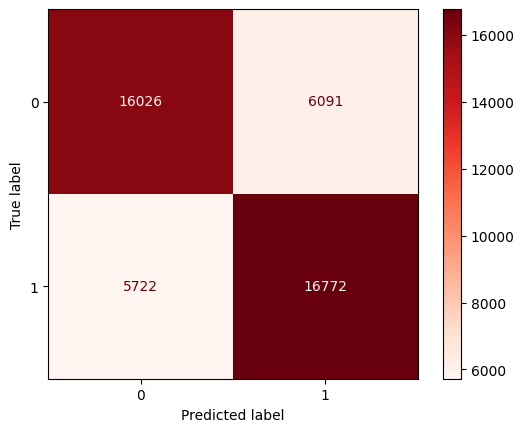

In [60]:
target = ['no', 'yes']
print(classification_report(y_TestENC, y_pred_test, target_names = target))
print('XGBoost Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_pipeXG, X_Test, y_TestENC, cmap='Reds'))

In [67]:
# Memeriksa kinerja model KNN dengan RandomSearch
y_pred_trainKNN = grid_pipeKNN.predict(X_Train)
y_pred_testKNN = grid_pipeKNN.predict(X_Test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
target = ['no', 'yes']
print(classification_report(y_TestENC, y_pred_test, target_names = target))
print('XGBoost Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_pipeKNN, X_Test, y_TestENC, cmap='Reds'))

#### ACCURACY AND F1 SCORE OF ALL MODEL

In [61]:
pipeline_model = {
    'KNN' : pipe_KNN,
    'Decision Tree' : grid_pipeDT,
    'Random Forest' : grid_pipeRF,
    'XGBoost'	    : grid_pipeXG
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = pipeline_model.keys(), index=['Accuracy', 'F1-Score'])

for metric, metric_func in metrics.items():
    for model_name, model_pipeline in pipeline_model.items():
        if metric == 'F1-Score':
            pos_label = 'no' 
            df_model.loc[metric, model_name] = metric_func(y_TestENC, model_pipeline.predict(X_Test), pos_label=pos_label)
        else:
            df_model.loc[metric, model_name] = metric_func(y_TestENC, model_pipeline.predict(X_Test))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
pipeline_model = {
    'KNN' : pipe_KNN,
    'SVC' : pipe_SVM,
    'Decision Tree' : grid_pipeDT,
    'Random Forest' : grid_pipeRF,
    'XGBoost'	    : grid_pipeXG
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = pipeline_model.keys(), index=['Accuracy', 'F1-Score'])

for metric, metric_func in metrics.items():
    for model_name, model_pipeline in pipeline_model.items():
        if metric == 'F1-Score':
            pos_label = 'no' 
            df_model.loc[metric, model_name] = metric_func(y_TestENC, model_pipeline.predict(X_Test), pos_label=pos_label)
        else:
            df_model.loc[metric, model_name] = metric_func(y_TestENC, model_pipeline.predict(X_Test))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Model Saving

In [ ]:
# Menyimpan Model dan scaling,encoding yang digunakan
with open('list_num_feature.txt', 'w')as file_1:
    json.dump(numerik, file_1)

with open('list_kat_feature.txt', 'w')as file_2:
    json.dump(kategorik, file_2)

with open('transformer.pkl', 'wb')as file_3:
    pickle.dump(transformer, file_3)

with open('grid_pipeXG.pkl', 'wb')as file_4:
    pickle.dump(grid_pipeXG, file_4)

## Kesimpulan

* Dari pembuatan beberapa model menggunakan SVM,KNN,DecisionTree,Random Forest dan XGBoostClassifier pada dataset smoking_drinking_dataset_Ver01.csv terkait apakah seseorang dapat dikatakan sebagai Pemabuk(Drunkard) dengan feature-feature tertentu. Didapatkan bahwa Menggunakan Model boosting XGBoost mendapatkan data yg bagus diantara model lainnya dengan menggunakan HyperParameter dengan metode Random Search dengan Train score 78% dan test score 73% (setelah pembulatan).
* Lalu didapatkan bahwa untuk mendapatkan accuracy yang lebih tinggi perlu dilakukan explore therhadap model ensemble learning dan atau model boosting yang lain.

#### Pertanyaan Konseptual
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

3. Jelaskan apa yang dimaksud dengan Cross Validation !

#### Jawaban:
1. Bagging(Bootstrap Aggregating) merupakan salah satu teknik dalam Machine Learning yang digunakan untuk meningkatkan kinerja model prediksi, terutama pada model-model yang memiliki variance yang tinggi (overfitting). Cara kerja bagging:     

Pembuatan Sampel:
        Pertama, dataset pelatihan yang tersedia diacak dengan penggantian untuk membuat beberapa sampel acak baru yang disebut bootstrap samples. Bootstrap sample memiliki ukuran yang sama dengan dataset asli,namun ada data dapat muncul lebih dari sekali dan beberapa mungkin tidak muncul sama sekali.

    Pembuatan Model:
        Lalu, menggunakan setiap bootstrap sample, model prediksi dibangun secara independen. Model ini bisa dari jenis yang sama atau beragam (misalnya, decision tree, neural network, dll.).

    Prediksi Kolektif:
        Setelah semua model dibuat, prediksi dari setiap model dihasilkan untuk setiap data tes atau data baru yang diberikan.

    Aggregasi Prediksi:
        Prediksi dari setiap model diambil secara kolektif, biasanya dengan cara voting (untuk klasifikasi) atau averaging (untuk regresi). Dengan demikian, setiap model memiliki "suara" yang sama dalam pengambilan keputusan akhir.

    Output Akhir:
        Hasil akhir adalah prediksi yang dihasilkan oleh model gabungan.
2. #### Random Forest
* Random Forest adalah jenis algoritma ensemble learning yang menggunakan beberapa pohon keputusan (decision trees) untuk membuat prediksi.
* Setiap pohon keputusan dalam Random Forest dibangun secara independen menggunakan bootstrap samples dari dataset pelatihan.
* Dalam setiap node pemisahan dalam pohon keputusan, algoritma memilih subset acak dari fitur untuk dipertimbangkan, bukan menggunakan seluruh fitur yang tersedia.
* Prediksi akhir dihasilkan dengan mengumpulkan hasil prediksi dari semua pohon keputusan, dengan menggunakan metode voting untuk klasifikasi atau averaging untuk regresi.
* Random Forest efektif dalam mengatasi overfitting dan bias-variance tradeoff, dan relatif mudah untuk diimplementasikan dan diinterpretasikan.



#### XGBoostClassifier (Extreme Gradient Boosting)
* XGBoostClassifier adalah algoritma ensemble learning yang menggunakan pendekatan boosting, yang berarti model dibangun secara berurutan, dengan setiap model berusaha untuk memperbaiki kesalahan model sebelumnya.
* XGBoostClassifier menggunakan pohon keputusan sebagai model dasarnya, mirip dengan Random Forest, tetapi pembangunan pohon dilakukan secara berurutan, bukan secara independen.
* XGBoostClassifier meminimalkan fungsi objektif yang berisi komponen untuk mengukur kesalahan prediksi dan komponen untuk mengontrol kompleksitas model (penalitas pada jumlah daun dan kedalaman pohon).
* XGBoostClassifier menggunakan teknik regularisasi dan penanganan nilai hilang yang canggih, serta dapat menangani masalah klasifikasi dan regresi.
* XGBoostClassifier memiliki kinerja yang superior dibandingkan algoritma yang lain, terutama dalam kompetisi machine learning, dan memiliki parameter yang lebih kompleks untuk disetel agar sesuai dengan data.
3. Cross Validation merupakan salah satu teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model prediksi. Tujuannya adalah untuk memperkirakan seberapa baik model yang dibangun akan berkinerja pada data yang belum pernah dilihat sebelumnya.